In [185]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import RANSACRegressor

from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import r2_score

data = pd.read_csv('./src/USA_cars_datasets.csv')    

В данном разделе посравниваем различные регрессии. Для оценки будем коэффициент детерминации. 

Коэффициент детерминации (R-квадрат) — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии в дисперсии зависимой переменной. 

В качестве зависимости снова возьмем в качестве зависимой переменной пробег авто, а в качестве независимой переменной - год выпуска авто.

Построим модели различных регрессий и построим графики, чтобы убедиться, что выполняется свойство гомоскедастичности.

Рассмотривать будем следующие модели регрессии - линейную, гребневую, ElasticNet и полиномиальную.

Линейная регрессия описана в файле linear-regression, гребневая в файле ridge-regression.

Эластичная сеть — модель регрессии с двумя регуляризаторами l1(как в регрессии Лассо), l2(как в гребневой регрессии)

Полиномиальная регрессия подойдет для нелинейно разделяемых данных. В данном методе проводится кривая линия, зависимая от точек плоскости. В полиномиальной регрессии степень некоторых независимых переменных превышает 1. 

Метод регрессии Лассо (LASSO, Least Absolute Shrinkage and Selection Operator) заключается во введении дополнительного слагаемого регуляризации в функционал оптимизации модели, что часто позволяет получать более устойчивое решение. Используется l1 регуляризация.

RANSAC (аббр. RANdom SAmple Consensus) — стабильный метод оценки параметров модели на основе случайных выборок. Схема RANSAC устойчива к зашумлённости исходных данных. Метод был предложен в 1981 году Фишлером и Боллесом.

Linear R2:  0.27711163617217627
Ridge R2:  0.2872090224439625
ElasticNet R2:  0.2916209016769704
Polynomial R2:  0.39569657402991354
Lasso R2:  0.27711443022919646
RANSAC R2:  -0.6296073359168042


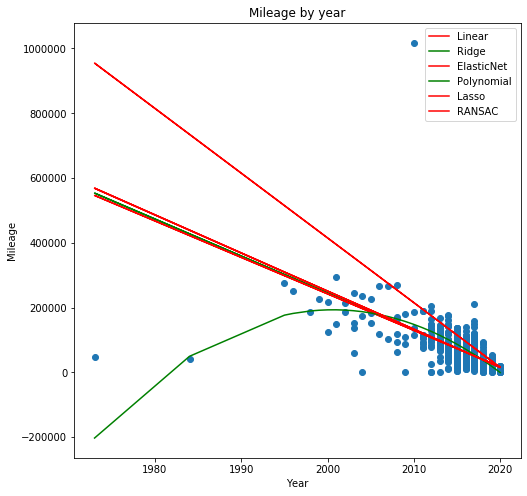

In [133]:
x = data.year.values
y = data.mileage.values

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=50)

df = pd.DataFrame({
    'x': x_test,
    'y': y_test
}).sort_values(by=['x'])

x_test_sorted = np.array(df.x)
y_test_sorted = df.y

model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
model2 = Ridge(alpha=500.5).fit(x_train.reshape(-1, 1), y_train)
model3 = ElasticNet(l1_ratio=0.5).fit(x_train.reshape(-1, 1), y_train) 
model4 = LinearRegression().fit(PolynomialFeatures(degree = 2).fit_transform(x_train.reshape(-1, 1)), y_train)
model5 = Lasso().fit(x_train.reshape(-1, 1), y_train) 
model6 = RANSACRegressor(residual_threshold=2).fit(x_train.reshape(-1, 1), y_train) 


y_pred = model.predict(x_test.reshape(-1, 1))
y_pred2 = model2.predict(x_test.reshape(-1, 1))
y_pred3 = model3.predict(x_test.reshape(-1,1))
y_pred4 = model4.predict(poly_reg.fit_transform(x_test_sorted.reshape(-1, 1)))
y_pred5 = model5.predict(x_test.reshape(-1,1))
y_pred6 = model6.predict(x_test.reshape(-1,1))

plt.figure(figsize=(8, 8))
plt.scatter(x_test, y_test)
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.title('Mileage by year')
plt.plot(x_test, y_pred, color='r', label = 'Linear')
plt.plot(x_test, y_pred2, color='g', label = 'Ridge')
plt.plot(x_test, y_pred3, color='r', label = 'ElasticNet')
plt.plot(x_test_sorted.reshape(-1, 1), y_pred4, color='g', label = 'Polynomial')
plt.plot(x_test, y_pred5, color='r', label = 'Lasso')
plt.plot(x_test, y_pred6, color='r', label = 'RANSAC')
plt.legend()

print('Linear R2: ', r2_score(y_test, y_pred))
print('Ridge R2: ', r2_score(y_test, y_pred2))
print('ElasticNet R2: ', r2_score(y_test, y_pred3))
print('Polynomial R2: ', r2_score(y_test_sorted, y_pred4))
print('Lasso R2: ', r2_score(y_test, y_pred5))
print('RANSAC R2: ', r2_score(y_test, y_pred6))

В данном случае лучше всего с задаче справилась полиномиальная регрессия. Теперь очистим данные от аномалий

In [91]:
clf = LocalOutlierFactor(n_neighbors=4)
predict = clf.fit_predict(x.reshape(-1, 1), y.reshape(-1, 1))

outline_indexes = np.where(predict == -1)
normal_indexes = np.where(predict == 1)

cleaned_x = x[normal_indexes]
cleaned_y = y[normal_indexes]

Построим всё теже модели для "очищенных от аномалий" данных.

Linear R2:  0.6236855225632657
Ridge R2:  0.6195581492058571
ElasticNet R2:  0.6173031262248434
Polynomial R2:  0.5640871195402655
Lasso R2:  0.6236844863041798
RANSAC R2:  -1.5229715610110075


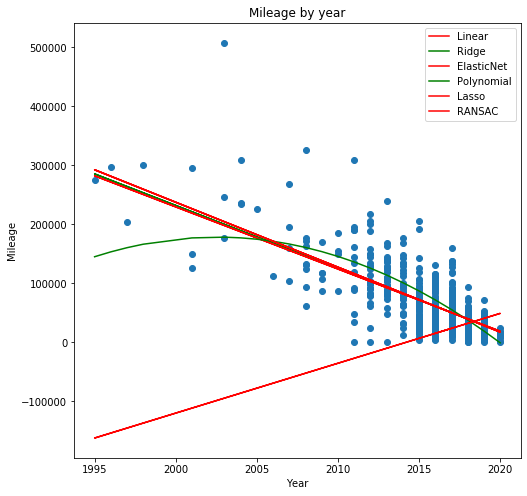

In [137]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_x, cleaned_y, test_size=0.4, random_state=50)

df = pd.DataFrame({
    'x': x_test,
    'y': y_test
}).sort_values(by=['x'])

x_test_sorted = np.array(df.x)
y_test_sorted = df.y

model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
model2 = Ridge(alpha=500.5).fit(x_train.reshape(-1, 1), y_train)
model3 = ElasticNet(l1_ratio=0.5).fit(x_train.reshape(-1, 1), y_train) 
model4 = LinearRegression().fit(PolynomialFeatures(degree = 2).fit_transform(x_train.reshape(-1, 1)), y_train)
model5 = Lasso().fit(x_train.reshape(-1, 1), y_train) 
model6 = RANSACRegressor(residual_threshold=2).fit(x_train.reshape(-1, 1), y_train) 


y_pred = model.predict(x_test.reshape(-1, 1))
y_pred2 = model2.predict(x_test.reshape(-1, 1))
y_pred3 = model3.predict(x_test.reshape(-1,1))
y_pred4 = model4.predict(poly_reg.fit_transform(x_test_sorted.reshape(-1, 1)))
y_pred5 = model5.predict(x_test.reshape(-1,1))
y_pred6 = model6.predict(x_test.reshape(-1,1))

plt.figure(figsize=(8, 8))

plt.xlabel('Year')
plt.ylabel('Mileage')
plt.title('Mileage by year')

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r', label = 'Linear')
plt.plot(x_test, y_pred2, color='g', label = 'Ridge')
plt.plot(x_test, y_pred3, color='r', label = 'ElasticNet')
plt.plot(x_test_sorted.reshape(-1, 1), y_pred4, color='g', label = 'Polynomial')
plt.plot(x_test, y_pred5, color='r', label = 'Lasso')
plt.plot(x_test, y_pred6, color='r', label = 'RANSAC')

plt.legend()

print('Linear R2: ', r2_score(y_test, y_pred))
print('Ridge R2: ', r2_score(y_test, y_pred2))
print('ElasticNet R2: ', r2_score(y_test, y_pred3))
print('Polynomial R2: ', r2_score(y_test_sorted, y_pred4))
print('Lasso R2: ', r2_score(y_test, y_pred5))
print('RANSAC R2: ', r2_score(y_test, y_pred6))

А в данном случае полиномиальная модель показала себя хуже всех. Тем не менее, большинство моделей сработали "плюс-минус одинаково".

Также хотелось бы отметить, что модель регрессии Хубера неприменима к нашей зависимости.

Huber R2:  -0.07257988528312631


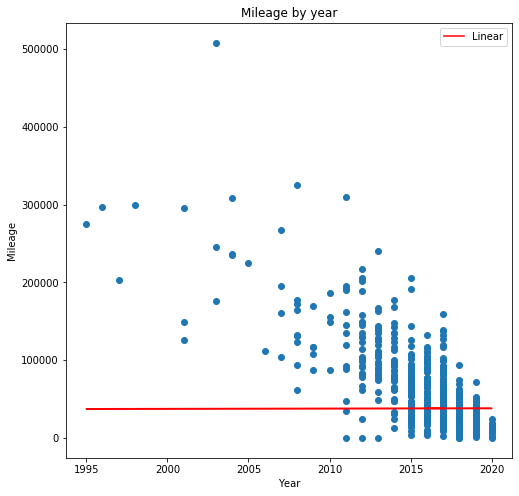

In [136]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_x, cleaned_y, test_size=0.4, random_state=50)

model = HuberRegressor().fit(x_train.reshape(-1, 1), y_train)

y_pred = model.predict(x_test.reshape(-1, 1))

plt.figure(figsize=(8, 8))

plt.xlabel('Year')
plt.ylabel('Mileage')
plt.title('Mileage by year')

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r', label = 'Linear')

plt.legend()

print('Huber R2: ', r2_score(y_test, y_pred))

[[ 27965.510994  ]
 [  9445.53182406]
 [239820.65651464]
 ...
 [  9667.51866375]
 [ 40010.15071366]
 [ 34167.27812999]]


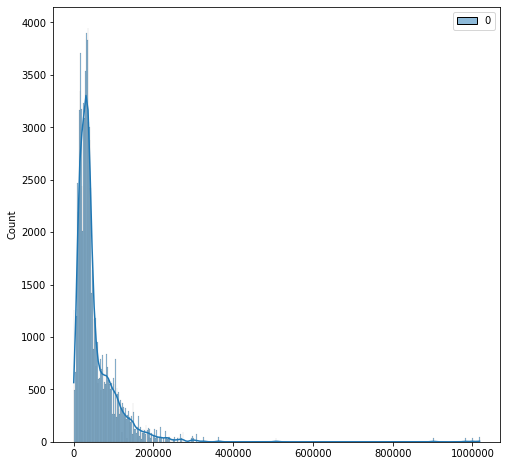

In [186]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=1.0, algorithm='auto')
kde.fit(y.reshape(-1, 1))
sample = kde.sample(100000)


print(sample)
# mean_ = np.mean(predict)

# std_ = np.std(predict)

# coeff = 4

# low = mean_ - std_ * coeff
# up = mean_ + std_ * coeff

# outline_indexes = np.where(np.logical_or(np.greater_equal(predict, up),np.less_equal(predict, low)) )
# normal_indexes = np.where(np.logical_and(np.greater(up, predict),np.less(low, predict)) )

plt.figure(figsize=(8, 8))
# plt.scatter(x[normal_indexes], y[normal_indexes])
# plt.scatter(x[outline_indexes], y[outline_indexes])
# plt.plot(range(100000), sample, color='r', label = 'RANSAC')
sns.histplot(data=sample, kde=True)